# Face Mask Detection Project

# Import Labraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, optimizers, models

# Load Data

In [5]:
data_path="E:/Study DATA/Deep learning Projects/Face Mask Detection Project/Face Dataset"

In [6]:
train_data_path=os.path.join(data_path, 'Train Data')
val_data_path=os.path.join(data_path, 'Validation Data')
test_data_path=os.path.join(data_path, "Test Data")

In [7]:
names=os.listdir(train_data_path)
names

['without_mask', 'with_mask']

In [8]:
def total_img(path,names):
    count=0
    for name in names:
        size=len(os.listdir(os.path.join(path, name)))
        count+=size
    return count

In [9]:
print("Total Training Images: ", total_img(train_data_path, names))
print("Total Validation Images: ", total_img(val_data_path, names))
print("Total Test Images: ", total_img(test_data_path, names))

Total Training Images:  3588
Total Validation Images:  780
Total Test Images:  34


# Data preprocessing

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

### ImageDataGenerator do all the above image preprocessing steps 

# Using ImageDataGenerator to read images from directories

In [10]:
datagenerator=ImageDataGenerator( 
                                   rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest' 
                                )

In [18]:
train_gen= datagenerator.flow_from_directory(
                                              train_data_path,
                                              batch_size=39,
                                              target_size=(150,150),
                                              class_mode='binary'
                                            )

Found 3588 images belonging to 2 classes.


In [19]:
val_gen= datagenerator.flow_from_directory(
                                            val_data_path,
                                            target_size=(150,150),
                                            batch_size=26,
                                            class_mode='binary'
                                        )

Found 780 images belonging to 2 classes.


In [20]:
labels=train_gen.class_indices
labels

{'with_mask': 0, 'without_mask': 1}

# Displaying some randomly augmented training image

In [14]:
img_path=r"E:\Study DATA\Deep learning Projects\Face Mask Detection Project\Face Dataset\Train Data\with_mask\0_0_3 copy 29.jpg"

AxesImage(80,52.8;496x369.6)


(-0.5, 149.5, 149.5, -0.5)

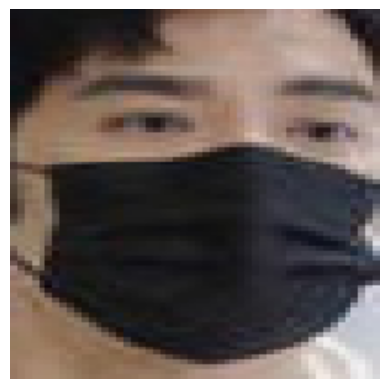

In [15]:
img=image.load_img(img_path, target_size=(150,150))

print(plt.imshow(img))
plt.axis('off')

In [16]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
print(x.shape)

(1, 150, 150, 3)


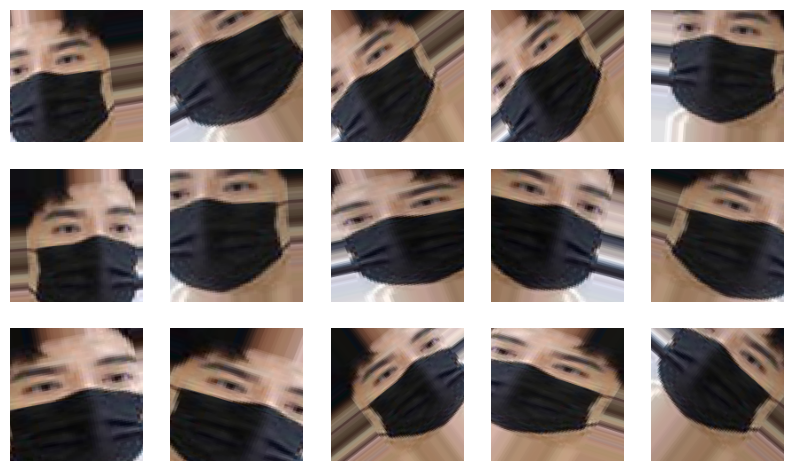

In [17]:
i=0
plt.figure(figsize=(10,10))
for k in range(15):
    for batch in datagenerator.flow(x, batch_size=1):
        plt.subplot(5,5, k+1)
        plt.imshow(image.array_to_img(batch[0]))
        plt.axis('off')
        i+=1
        if i%5==0:
            break

# Creating Network Architecture

In [45]:
model=models.Sequential()

model.add(layers.Conv2D(16, (5,5), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 64)      

In [47]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training

In [49]:
history=model.fit(train_gen, steps_per_epoch=92, epochs=100, validation_data=val_gen, validation_steps=30)

Epoch 1/100
92/92 [==============================] - 144s 2s/step - loss: 0.5148 - accuracy: 0.7469 - val_loss: 0.3686 - val_accuracy: 0.8308
Epoch 2/100
92/92 [==============================] - 138s 1s/step - loss: 0.3384 - accuracy: 0.8654 - val_loss: 0.3201 - val_accuracy: 0.8859
Epoch 3/100
92/92 [==============================] - 137s 1s/step - loss: 0.3186 - accuracy: 0.8707 - val_loss: 0.3061 - val_accuracy: 0.8910
Epoch 4/100
92/92 [==============================] - 136s 1s/step - loss: 0.2985 - accuracy: 0.8829 - val_loss: 0.2814 - val_accuracy: 0.8910
Epoch 5/100
92/92 [==============================] - 138s 1s/step - loss: 0.2697 - accuracy: 0.8955 - val_loss: 0.2943 - val_accuracy: 0.8936
Epoch 6/100
92/92 [==============================] - 137s 1s/step - loss: 0.2676 - accuracy: 0.8974 - val_loss: 0.2721 - val_accuracy: 0.8923
Epoch 7/100
92/92 [==============================] - 137s 1s/step - loss: 0.2620 - accuracy: 0.9013 - val_loss: 0.2381 - val_accuracy: 0.9141
Epoch 

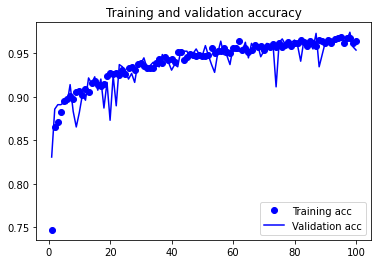

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

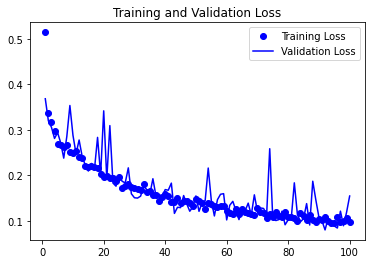

In [51]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss" )
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [52]:
model.save("E:/Study DATA/Deep learning Projects/Face Mask Detection Project/Face Mask Detection Model.h5")

In [57]:
testdatagen=ImageDataGenerator(rescale=1./255)

In [58]:
test_generator=testdatagen.flow_from_directory(
                                            test_data_path,
                                            batch_size=12,
                                            target_size=(150,150),
                                            class_mode='binary'
                                            )

Found 34 images belonging to 2 classes.


In [59]:
loss,acc= model.evaluate(test_generator)

3/3 [==============================] - 0s 118ms/step - loss: 0.0321 - accuracy: 1.0000


In [60]:
print("Test Data Loss: ",loss)
print("Test Data Accuracy: ",acc)

Test Data Loss:  0.03210682421922684
Test Data Accuracy:  1.0
